<h1 style="color:red", align = center>Prac 5.1 : Feature Scaling Normalization</h1>

**732_Saksham**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Dataset/wine_data.csv', header= None, usecols=[0,1,2])

df.columns = ['class label', 'Alcohol', 'Malic acid']

df.head()

,class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


**Creating new df of outliers.**

In [4]:
# adding outliers

new_df = pd.DataFrame({
    'Alcohol' : [30, 35 ,40],
    'Malic acid' : [15, 20, 25],
    'class label' : [1, 2, 3]
})

new_df

,Alcohol,Malic acid,class label
0,30,15,1
1,35,20,2
2,40,25,3


**Now creating df2 with old values and new outliers.**

In [5]:
df2 = df.append(new_df)

df2.tail()

,class label,Alcohol,Malic acid
176,3,13.17,2.59
177,3,14.13,4.10
0,1,30.00,15.00
1,2,35.00,20.00
2,3,40.00,25.00


<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

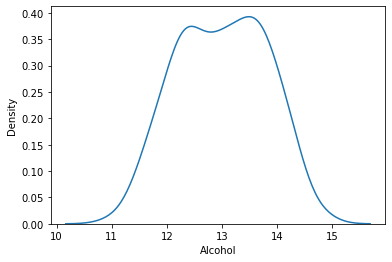

In [6]:
sns.kdeplot(df['Alcohol'])

<AxesSubplot:xlabel='Malic acid', ylabel='Density'>

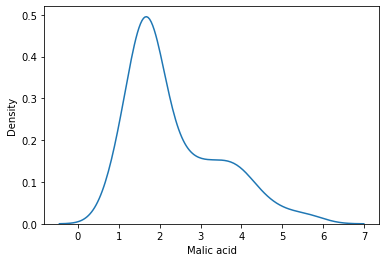

In [7]:
sns.kdeplot(df['Malic acid'])

<AxesSubplot:xlabel='Alcohol', ylabel='Malic acid'>

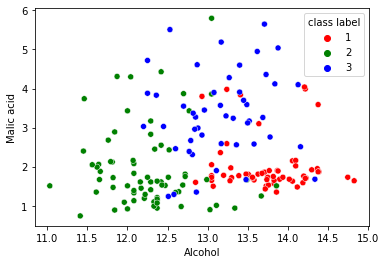

In [8]:
color_dict = {1:'red', 2:'green', 3:'blue'}

sns.scatterplot(df['Alcohol'], df['Malic acid'], hue = df['class label'], palette= color_dict)

In [9]:
x  = df.drop('class label' , axis = 1)

x.head()

,Alcohol,Malic acid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59


In [10]:
y = df['class label']

y.head()

0    1
1    1
2    1
3    1
4    1
Name: class label, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size= 0.3, random_state=2)

In [12]:
x_train.shape, x_test.shape

((124, 2), (54, 2))

In [13]:
# Normalization
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()

In [14]:
scalar.fit(x_train)

MinMaxScaler()

In [15]:
x_train_scaled = scalar.fit_transform(x_train)

In [16]:
x_test_scaled = scalar.fit_transform(x_test)

In [17]:
x_test_scaled

array([[0.7005988 , 0.19565217],
       [0.43113772, 0.16996047],
       [0.61077844, 0.58498024],
       [0.49101796, 0.25889328],
       [0.61976048, 0.21146245],
       [1.        , 0.19565217],
       [0.28742515, 0.09288538],
       [0.40718563, 0.32608696],
       [0.10479042, 0.38339921],
       [0.80538922, 0.25296443],
       [0.2754491 , 0.04940711],
       [0.88622754, 0.23913043],
       [0.89221557, 0.22332016],
       [0.87724551, 0.18577075],
       [0.5       , 0.62450593],
       [0.30239521, 0.72924901],
       [0.73952096, 0.22727273],
       [0.5239521 , 0.3201581 ],
       [0.78143713, 0.18577075],
       [0.31137725, 0.45256917],
       [0.43413174, 0.12055336],
       [0.83832335, 0.65217391],
       [0.25149701, 0.19565217],
       [0.06287425, 0.24703557],
       [0.83532934, 0.20158103],
       [0.70658683, 0.22924901],
       [0.26347305, 0.41304348],
       [0.5988024 , 0.61264822],
       [0.69760479, 0.18379447],
       [0.6257485 , 0.21146245],
       [0.

In [18]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns= x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns= x_test.columns)

In [19]:
x_train_scaled.describe()

,Alcohol,Malic acid
count,124.000000,124.000000
mean,0.517508,0.299285
std,0.207861,0.236913
min,0.000000,0.000000
25%,0.351974,0.140756
50%,0.531579,0.192227
75%,0.688816,0.443277
max,1.000000,1.000000


In [20]:
x_test_scaled.describe()

,Alcohol,Malic acid
count,54.000000,54.000000
mean,0.479042,0.325355
std,0.259803,0.217652
min,0.000000,0.000000
25%,0.278443,0.185771
50%,0.477545,0.234190
75%,0.699850,0.497036
max,1.000000,1.000000


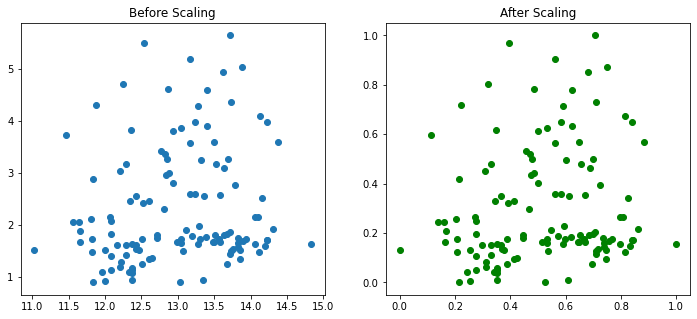

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(x_train['Alcohol'],x_train['Malic acid'])
ax1.set_title("Before Scaling")



ax2.scatter(x_train_scaled['Alcohol'], x_train_scaled['Malic acid'], color ="Green")
ax2.set_title("After Scaling")

plt.show()

## After Adding Outliers

In [22]:
df2.tail()

,class label,Alcohol,Malic acid
176,3,13.17,2.59
177,3,14.13,4.10
0,1,30.00,15.00
1,2,35.00,20.00
2,3,40.00,25.00


In [39]:
df2.reset_index(drop=True, inplace=True)
df2.tail()

,class label,Alcohol,Malic acid
176,3,13.17,2.59
177,3,14.13,4.10
178,1,30.00,15.00
179,2,35.00,20.00
180,3,40.00,25.00


<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

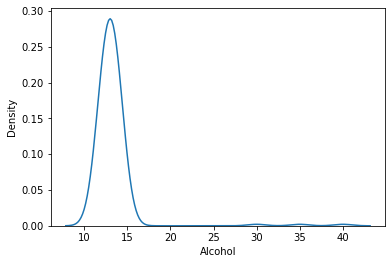

In [24]:
sns.kdeplot(df2['Alcohol'])

[Text(0.5, 1.0, 'Malic acid')]

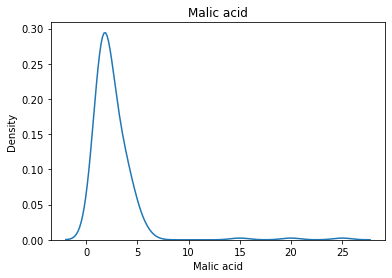

In [41]:
sns.kdeplot(df2['Malic acid']).set(title = "Malic acid")

<AxesSubplot:xlabel='Alcohol', ylabel='Malic acid'>

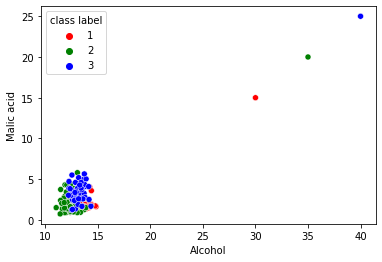

In [26]:
color_dict = {1:'red', 2:'green', 3:'blue'}

sns.scatterplot(df2['Alcohol'], df2['Malic acid'], hue = df2['class label'], palette= color_dict)

In [27]:
x2  = df2.drop('class label' , axis = 1)

x2.tail()

,Alcohol,Malic acid
176,13.17,2.59
177,14.13,4.10
178,30.00,15.00
179,35.00,20.00
180,40.00,25.00


In [28]:
y2 = df2['class label']

y2.tail()

176    3
177    3
178    1
179    2
180    3
Name: class label, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

x_train2, x_test2, y_train2, y_test2 =  train_test_split(x2, y2, test_size= 0.3, random_state=2)

In [30]:
x_train2.shape, x_test2.shape

((126, 2), (55, 2))

In [31]:
# Normalization
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()

In [32]:
scalar.fit(x_train2)

MinMaxScaler()

In [33]:
x_train_scaled2 = scalar.fit_transform(x_train2)

In [34]:
x_test_scaled2 = scalar.fit_transform(x_test2)

In [35]:
x_train_scaled2 = pd.DataFrame(x_train_scaled2, columns= x_train2.columns)
x_test_scaled2 = pd.DataFrame(x_test_scaled2, columns= x_test2.columns)

In [36]:
x_train_scaled2.describe()

,Alcohol,Malic acid
count,126.000000,126.000000
mean,0.084189,0.076304
std,0.121702,0.124543
min,0.000000,0.000000
25%,0.043838,0.028411
50%,0.069382,0.037951
75%,0.090007,0.094048
max,1.000000,1.000000


In [37]:
x_test_scaled2.describe()

,Alcohol,Malic acid
count,55.000000,55.000000
mean,0.514262,0.428612
std,0.245230,0.272730
min,0.000000,0.000000
25%,0.308383,0.241602
50%,0.508982,0.312661
75%,0.708084,0.621447
max,1.000000,1.000000


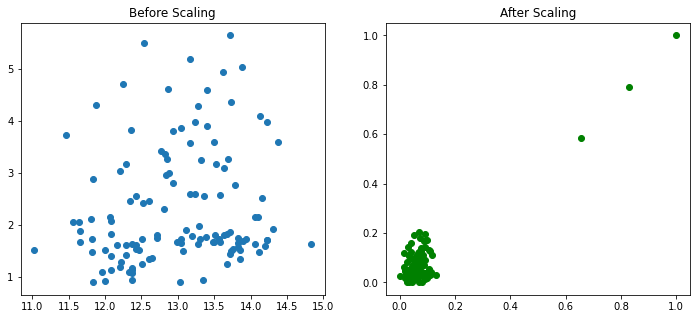

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(x_train['Alcohol'],x_train['Malic acid'])
ax1.set_title("Before Scaling")



ax2.scatter(x_train_scaled2['Alcohol'], x_train_scaled2['Malic acid'], color ="Green")
ax2.set_title("After Scaling")

plt.show()